In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the 'Customer Churn Problem' data

CustChurn_T = pd.read_csv(r"C:\Users\bommi\OneDrive\Documents\AI codes\Churn_Modelling_3.csv", header=0)
CustChurn_T.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Copy 10% data (stratified split on target variable) to new dataset 

CustChurn = CustChurn_T.groupby('Exited', group_keys=False).apply(lambda x: x.sample(frac=0.1))

# Display the shape

CustChurn.shape

(1000, 14)

In [4]:
# Re-set the index

CustChurn = CustChurn.reset_index(drop=True)

# Copy to back-up file

CustChurn_bk = CustChurn.copy()

# Display information of the dataset

CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        1000 non-null   int64  
 1   CustomerId       1000 non-null   int64  
 2   Surname          1000 non-null   object 
 3   CreditScore      1000 non-null   int64  
 4   Geography        1000 non-null   object 
 5   Gender           1000 non-null   object 
 6   Age              1000 non-null   int64  
 7   Tenure           1000 non-null   int64  
 8   Balance          1000 non-null   float64
 9   NumOfProducts    1000 non-null   int64  
 10  HasCrCard        1000 non-null   int64  
 11  IsActiveMember   1000 non-null   int64  
 12  EstimatedSalary  1000 non-null   float64
 13  Exited           1000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 109.5+ KB


In [5]:
# Display the Exited varibale count

CustChurn_T['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
# Display the Exited varibale count

CustChurn['Exited'].value_counts()

0    796
1    204
Name: Exited, dtype: int64

In [7]:
# Check if there are duplicate rows in the dataset

CustChurn.duplicated().any()

False

In [8]:
# Drop the variables which are not infulencing on target variable

CustChurn = CustChurn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
# Display the information of dataset

CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      1000 non-null   int64  
 1   Geography        1000 non-null   object 
 2   Gender           1000 non-null   object 
 3   Age              1000 non-null   int64  
 4   Tenure           1000 non-null   int64  
 5   Balance          1000 non-null   float64
 6   NumOfProducts    1000 non-null   int64  
 7   HasCrCard        1000 non-null   int64  
 8   IsActiveMember   1000 non-null   int64  
 9   EstimatedSalary  1000 non-null   float64
 10  Exited           1000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 86.1+ KB


In [10]:
# Display the Geography varibles count

CustChurn['Geography'].value_counts()

France     477
Spain      266
Germany    257
Name: Geography, dtype: int64

In [11]:
# Display the Gender varibale count

CustChurn['Gender'].value_counts()

Male      529
Female    471
Name: Gender, dtype: int64

In [12]:
# Convert 'Geography' and 'Gender' to numerical format using one hot encoding

CustChurn = pd.get_dummies(CustChurn, columns=['Geography', 'Gender'])
CustChurn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,850,42,0,0.00,2,1,0,44165.84,0,1,0,0,0,1
1,686,26,1,57422.62,1,1,1,79189.40,0,0,1,0,0,1
2,789,27,6,0.00,2,1,0,103603.65,0,1,0,0,0,1
3,760,43,6,175735.50,1,1,1,157337.29,0,0,0,1,0,1
4,597,52,8,83693.34,2,1,1,161083.53,0,0,1,0,0,1


In [13]:
# Display the information of dataset after conversion of variables

CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1000 non-null   int64  
 1   Age                1000 non-null   int64  
 2   Tenure             1000 non-null   int64  
 3   Balance            1000 non-null   float64
 4   NumOfProducts      1000 non-null   int64  
 5   HasCrCard          1000 non-null   int64  
 6   IsActiveMember     1000 non-null   int64  
 7   EstimatedSalary    1000 non-null   float64
 8   Exited             1000 non-null   int64  
 9   Geography_France   1000 non-null   uint8  
 10  Geography_Germany  1000 non-null   uint8  
 11  Geography_Spain    1000 non-null   uint8  
 12  Gender_Female      1000 non-null   uint8  
 13  Gender_Male        1000 non-null   uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 75.3 KB


In [14]:
# Display the target varibale count

CustChurn['Exited'].value_counts()

0    796
1    204
Name: Exited, dtype: int64

In [15]:
# Convert the target data type into category variable

CustChurn['Exited'] = CustChurn['Exited'].astype("category")

In [16]:
# Identify the Independent and Target variables

IndepVar = []
for col in CustChurn.columns:
    if col != 'Exited':
        IndepVar.append(col)

TargetVar = 'Exited'

x = CustChurn[IndepVar]
y = CustChurn[TargetVar]

In [17]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42) 

In [18]:
# Feature Scaling - Each independent variable is in different range. The process of transforming all the 
# features in the given data set to a fixed range is known as ‘Scaling’

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Confusion matrix : 
 [[ 30  38]
 [  8 224]]
Outcome values : 
 30 38 8 224
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.44      0.57        68
           0       0.85      0.97      0.91       232

    accuracy                           0.85       300
   macro avg       0.82      0.70      0.74       300
weighted avg       0.84      0.85      0.83       300

Accuracy : 84.7 %
Precision : 78.9 %
Recall : 44.1 %
F1 Score : 0.566
Specificity or True Negative Rate : 96.6 %
Balanced Accuracy : 70.4 %
MCC : 0.512
roc_auc_score: 0.703


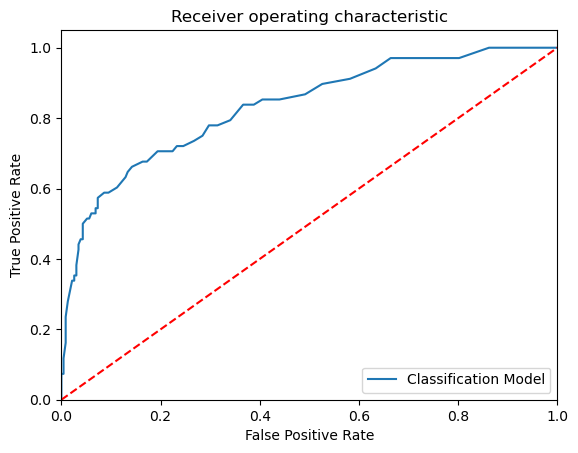

-----------------------------------------------------------------------------------------------------


In [19]:
# To build the 'RandomForestClassifier' model with random sampling

from sklearn.ensemble import RandomForestClassifier

ModelRF1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF1.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF1.predict(x_test)
y_pred_prob = ModelRF1.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------

#----------------------------------------------------------------------------------------------------------

# Hyperparameter tuning by GridSearchCV

In [20]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
GS_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create object for model

ModelRF2 = RandomForestClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelRF2, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [21]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [22]:
# Display of best parameter

best_grid = Grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=4, min_samples_split=6)

Confusion matrix : 
 [[ 24  44]
 [  7 225]]
Outcome values : 
 24 44 7 225
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.35      0.48        68
           0       0.84      0.97      0.90       232

    accuracy                           0.83       300
   macro avg       0.81      0.66      0.69       300
weighted avg       0.82      0.83      0.80       300

Accuracy : 83.0 %
Precision : 77.4 %
Recall : 35.3 %
F1 Score : 0.485
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 66.2 %
MCC : 0.444
roc_auc_score: 0.661


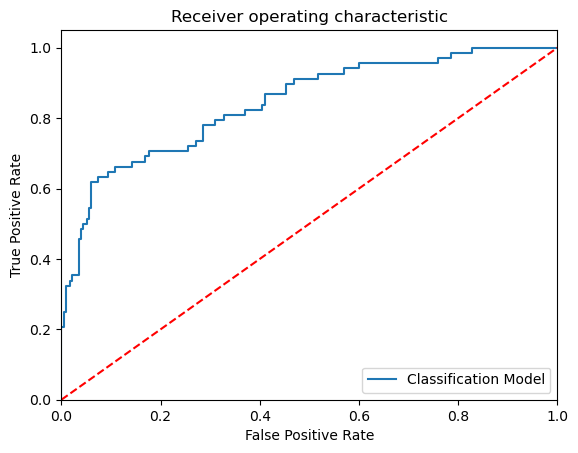

-----------------------------------------------------------------------------------------------------


In [23]:
# To build the 'RandomForestClassifier' model with random sampling with Hyperparametr tuning with gridseachCV

from sklearn.ensemble import RandomForestClassifier

ModelRF3 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=4,
                                  min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=3, 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF3.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF3.predict(x_test)
y_pred_prob = ModelRF3.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF3.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------


# Hyperparameter tuning with RandomizedSearchCV

In [24]:
# Hyperparameter tuning using RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # number of trees in the random forest 
max_features = ['auto', 'sqrt', 'log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
# Importing Random Forest Classifier from the sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier

ModelRF4 = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = ModelRF4,param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

# Fit the model with train data

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
# Print the best parameters

print ('Random grid: ', random_grid, '\n')

# print the best parameters

print ('Best Parameters: ', rf_random.best_params_, ' \n')

In [ ]:
# To build the 'RandomForestClassifier' model with random sampling with Hyperparametr tuning with RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

ModelRF5 = RandomForestClassifier(n_estimators=1200, criterion='gini', max_depth=110, min_samples_split=10,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF5.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF5.predict(x_test)
y_pred_prob = ModelRF5.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF5.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')


In [ ]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

MHealthLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0)

# Train the model with training data

MHealthLR = MHealthLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthLR.predict(x_test)
y_pred_prob = MHealthLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2 ,3, 4 , 5]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#

